# 证券的“暴力美学” (Explosive Power Analysis)

In [2]:
import akshare as ak
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
print('💉 正在提取国泰证券(012363)的“疯狗基因”...')
df = ak.fund_open_fund_info_em(symbol='012363',indicator='单位净值走势')
df['date'] = pd.to_datetime(df['净值日期'])
df['price'] = pd.to_numeric(df['单位净值'])
df = df.sort_values('date').set_index('date')
df['pct'] = df['price'].pct_change()*100
big_days = df[df['pct']>3.0]
total_days = len(df)
crazy_days = len(big_days)
ratio = crazy_days/total_days *100
print('-'*30)
print(f'📊 暴力美学数据统计 (近{total_days}个交易日):')
print(f'😴 装死天数: {total_days - crazy_days}天')
print(f'🚀 暴涨天数 (>3%):{crazy_days}天')
print(f'🔥 爆发概率: 仅为{ratio:.2f}%')
print('-'*30)
print('💡 结论：你必须忍受 95% 的垃圾时间，才能抓住这 5% 的暴利。')


💉 正在提取国泰证券(012363)的“疯狗基因”...
------------------------------
📊 暴力美学数据统计 (近1116个交易日):
😴 装死天数: 1075天
🚀 暴涨天数 (>3%):41天
🔥 爆发概率: 仅为3.67%
------------------------------
💡 结论：你必须忍受 95% 的垃圾时间，才能抓住这 5% 的暴利。


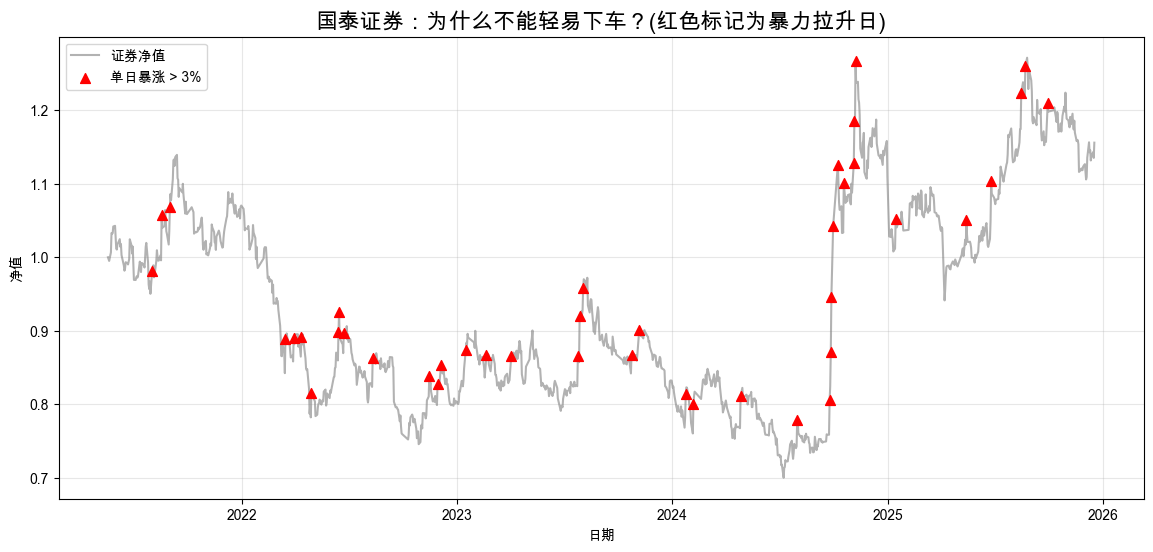

In [4]:
plt.figure(figsize=(14,6))
plt.plot(df.index,df['price'],label='证券净值',color = 'gray',alpha=0.6)
plt.scatter(big_days.index,big_days['price'],color='red',s=50,marker='^',label = '单日暴涨 > 3%',zorder=5)
plt.title('国泰证券：为什么不能轻易下车？(红色标记为暴力拉升日)',fontsize = 16)
plt.xlabel('日期')
plt.ylabel('净值')
plt.legend()
plt.grid(True,alpha =0.3)
plt.show()


In [6]:
df['no_big_days']=df['pct'].apply(lambda x:0 if x>3.0 else x)
df['miss_out_value'] = (1+df['no_big_days']/100).cumprod()
final_real = (df['price'].iloc[-1]/df['price'].iloc[0] -1)*100
final_miss = (df['miss_out_value'].iloc[-1]-1)*100
print(f"\n💀 扎心对比：")
print(f"💰 死拿不动总收益: {final_real:.2f}%")
print(f"💸 完美错过暴涨日: {final_miss:.2f}%")


💀 扎心对比：
💰 死拿不动总收益: 15.58%
💸 完美错过暴涨日: -82.42%
